In [55]:
# importing libraries
import keras
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from numpy import loadtxt
from numpy import reshape
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import metrics
from keras import backend as K
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import KFold
from matplotlib import pyplot

In [56]:
# setting numpy print option
np.set_printoptions(suppress=True)

In [57]:
# load the dataset
dataset = loadtxt('desharnais.csv', delimiter=',')
print(dataset.shape)

(77, 12)


In [58]:
# selecting input and output for kfold
X = np.delete(dataset, [0,3,5], axis=1)
y = dataset[:,5]

In [59]:
# model estructuration
model = Sequential()
model.add(Dense(64, input_dim=9))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

In [60]:
# compile model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[metrics.mse, metrics.mae])

In [61]:
# kfold split
# model training and evaluation
kf = KFold(n_splits=10)
f = 1
for train_index, test_index in kf.split(X):
    # defining train and test sets for input and output
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # standardize dataset
    ss = StandardScaler()
    # train standardize
    sclXtrain = ss.fit(X_train)
    X_train = sclXtrain.transform(X_train)
    sclYtrain = ss.fit(y_train.reshape(-1,1))
    y_train = sclYtrain.transform(y_train.reshape(-1,1))

    # test standardize
    sclXtest = ss.fit(X_test)
    X_test = sclXtest.transform(X_test)
    sclYtest = ss.fit(y_test.reshape(-1,1))
    y_test = sclYtest.transform(y_test.reshape(-1,1))
    
    # fit the keras model on the dataset
    model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.2, verbose=0)
    
    # evaluate the model 3 metrics
    _,train_mse,train_mae = model.evaluate(X_train, y_train, verbose=0)
    _,test_mse,test_mae = model.evaluate(X_test, y_test, verbose=0)
    
    # storing each fold metrics in nparray
    all_train_mse = np.append(all_train_mse,train_mse)
    all_train_mae = np.append(all_train_mae,train_mae)
    all_test_mse = np.append(all_test_mse,test_mse)
    all_test_mae = np.append(all_test_mae,test_mae)
    
    print('FOLD: %d' % f)
    print('TRAIN | mse: %.3f, mae: %.3f' % (train_mse, train_mae))
    print('TEST  | mse: %.3f, mae: %.3f' % (test_mse, test_mae))
    f+=1

FOLD: 1
TRAIN | mse: 0.183, mae: 0.251
TEST  | mse: 0.630, mae: 0.613
FOLD: 2
TRAIN | mse: 0.319, mae: 0.276
TEST  | mse: 0.868, mae: 0.693
FOLD: 3
TRAIN | mse: 0.208, mae: 0.207
TEST  | mse: 1.166, mae: 0.713
FOLD: 4
TRAIN | mse: 0.525, mae: 0.292
TEST  | mse: 1.292, mae: 0.869
FOLD: 5
TRAIN | mse: 1.151, mae: 0.370
TEST  | mse: 1.559, mae: 0.940
FOLD: 6
TRAIN | mse: 4.950, mae: 0.610
TEST  | mse: 0.385, mae: 0.482
FOLD: 7
TRAIN | mse: 1.044, mae: 0.358
TEST  | mse: 1.264, mae: 0.580
FOLD: 8
TRAIN | mse: 1.219, mae: 0.373
TEST  | mse: 2.050, mae: 0.932
FOLD: 9
TRAIN | mse: 1.317, mae: 0.345
TEST  | mse: 3.758, mae: 0.959
FOLD: 10
TRAIN | mse: 0.187, mae: 0.206
TEST  | mse: 0.982, mae: 0.800


In [62]:
mean_mse_train = np.mean(all_train_mse)
mean_mae_train = np.mean(all_train_mae)
mean_mse_test = np.mean(all_test_mse)
mean_mae_test = np.mean(all_test_mae)

print('MLP TRAIN METRICS MEAN AFTER 10 FOLDS')
print('MSE: %.3f | MAE: %.3f' % (mean_mse_train, mean_mae_train))
print('MLP TEST METRICS MEAN AFTER 10 FOLDS')
print('MSE: %.3f | MAE: %.3f' % (mean_mse_test, mean_mae_test))

MLP TRAIN METRICS MEAN AFTER 10 FOLDS
MSE: 1.084 | MAE: 0.327
MLP TEST METRICS MEAN AFTER 10 FOLDS
MSE: 1.613 | MAE: 0.713


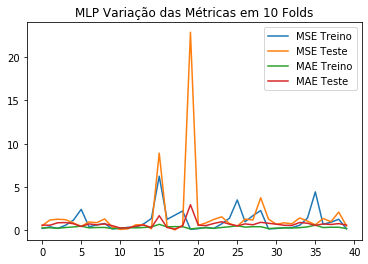

In [54]:
# plot mlp metrics variation
pyplot.title('MLP Variação das Métricas em 10 Folds')
pyplot.plot(all_train_mse, label='MSE Treino')
pyplot.plot(all_test_mse, label='MSE Teste')
pyplot.plot(all_train_mae, label='MAE Treino')
pyplot.plot(all_test_mae, label='MAE Teste')
pyplot.legend()
pyplot.show()